In [74]:
# Importing libraries for data preparation and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller, acf
from statsmodels.tsa.seasonal import seasonal_decompose
from pandas.plotting import autocorrelation_plot
from pmdarima.arima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# Importing libraries for machine learning models
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [3]:
path="DATASET PENGIRIMAN BARANG.xlsx"
# Load the dataset
df = pd.read_excel(path)

# OBSERVASI DATA

In [4]:
# Melihat data teratas
df.head()

,no,barcode_kemasan,jenis_barang,jumlah_barang,Unnamed: 4,PEMESANAN,NOMOR_PEMESANAN,status,area_pengiriman,tanggal_pengiriman,harga_per_pack,jumlah_harga,petugas_1,tahun_pengiriman,bulan_pengambilan
0,1,A109BXAAN1630,Skrup S10,25,25,WEBSITE,SJ-0002/03/KBJ/2024,sudah dikirim,JABODETABEK,2024-01-22,21000,525000,SPVY,2024.0,1.0
1,2,A109BXAAN1640,Skrup S10,25,25,WEBSITE,SJ-0002/03/KBJ/2024,sudah dikirim,JABODETABEK,2024-01-22,21000,525000,SPVY,2024.0,1.0
2,3,A109BXAAN2463,Skrup kayu 3 x 12mm,25,25,WEBSITE,SJ-0002/03/KBJ/2024,sudah dikirim,JABODETABEK,2024-01-22,9000,225000,SPVY,2024.0,1.0
3,4,A109BXAAN2464,Skrup kayu 3 x 12mm,25,25,WEBSITE,SJ-0002/03/KBJ/2024,sudah dikirim,JABODETABEK,2024-01-22,9000,225000,SPVY,2024.0,1.0
4,5,A109BXAAN2465,Skrup kayu 3 x 12mm,25,25,WEBSITE,SJ-0002/03/KBJ/2024,sudah dikirim,JABODETABEK,2024-01-22,9000,225000,SPVY,2024.0,1.0


In [5]:
# Melihat struktur data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28526 entries, 0 to 28525
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   no                  28526 non-null  int64         
 1   barcode_kemasan     28526 non-null  object        
 2   jenis_barang        28526 non-null  object        
 3   jumlah_barang       28526 non-null  int64         
 4   Unnamed: 4          28526 non-null  int64         
 5   PEMESANAN           28526 non-null  object        
 6   NOMOR_PEMESANAN     28526 non-null  object        
 7   status              28526 non-null  object        
 8   area_pengiriman     28526 non-null  object        
 9   tanggal_pengiriman  28383 non-null  datetime64[ns]
 10  harga_per_pack      28526 non-null  int64         
 11  jumlah_harga        28526 non-null  int64         
 12  petugas_1           27240 non-null  object        
 13  tahun_pengiriman    28383 non-null  float64   

In [6]:
# Melihat informasi umum tentang dataset
df.describe()

,no,jumlah_barang,Unnamed: 4,tanggal_pengiriman,harga_per_pack,jumlah_harga,tahun_pengiriman,bulan_pengambilan
count,28526.000000,28526.000000,28526.000000,28383,28526.000000,2.852600e+04,28383.0,28383.000000
mean,4.464664,39.724146,39.724146,2024-07-17 14:38:43.390761728,15354.741464,6.069973e+05,2024.0,7.024310
min,1.000000,1.000000,1.000000,2024-01-15 00:00:00,5600.000000,5.600000e+03,2024.0,1.000000
25%,2.000000,20.000000,20.000000,2024-05-15 00:00:00,9000.000000,2.700000e+05,2024.0,5.000000
50%,4.000000,32.000000,32.000000,2024-07-22 00:00:00,15500.000000,4.830000e+05,2024.0,7.000000
75%,7.000000,55.000000,55.000000,2024-09-20 00:00:00,21000.000000,8.295000e+05,2024.0,9.000000
max,11.000000,102.000000,102.000000,2024-12-20 00:00:00,23700.000000,2.417400e+06,2024.0,12.000000
std,2.844703,24.756861,24.756861,NaN,5657.485223,4.502635e+05,0.0,2.866791


In [7]:
# Drop kolom yang tidak diperlukan
df = df.drop(columns=['Unnamed: 4', 'no'])

In [8]:
df.head()

,barcode_kemasan,jenis_barang,jumlah_barang,PEMESANAN,NOMOR_PEMESANAN,status,area_pengiriman,tanggal_pengiriman,harga_per_pack,jumlah_harga,petugas_1,tahun_pengiriman,bulan_pengambilan
0,A109BXAAN1630,Skrup S10,25,WEBSITE,SJ-0002/03/KBJ/2024,sudah dikirim,JABODETABEK,2024-01-22,21000,525000,SPVY,2024.0,1.0
1,A109BXAAN1640,Skrup S10,25,WEBSITE,SJ-0002/03/KBJ/2024,sudah dikirim,JABODETABEK,2024-01-22,21000,525000,SPVY,2024.0,1.0
2,A109BXAAN2463,Skrup kayu 3 x 12mm,25,WEBSITE,SJ-0002/03/KBJ/2024,sudah dikirim,JABODETABEK,2024-01-22,9000,225000,SPVY,2024.0,1.0
3,A109BXAAN2464,Skrup kayu 3 x 12mm,25,WEBSITE,SJ-0002/03/KBJ/2024,sudah dikirim,JABODETABEK,2024-01-22,9000,225000,SPVY,2024.0,1.0
4,A109BXAAN2465,Skrup kayu 3 x 12mm,25,WEBSITE,SJ-0002/03/KBJ/2024,sudah dikirim,JABODETABEK,2024-01-22,9000,225000,SPVY,2024.0,1.0


In [10]:
# Membuat dataframe jumlah barang per jenis_barang dan per bulan
df_grouped_bulan = df.groupby(['jenis_barang', 'bulan_pengambilan'])['jumlah_barang'].sum().reset_index()
df_grouped_bulan

,jenis_barang,bulan_pengambilan,jumlah_barang
0,"Baut Rofing 2,5cm",1.0,298
1,"Baut Rofing 2,5cm",2.0,967
2,"Baut Rofing 2,5cm",3.0,947
3,"Baut Rofing 2,5cm",4.0,604
4,"Baut Rofing 2,5cm",5.0,812
...,...,...,...
234,Skrup kayu 3 x 12mm,8.0,31752
235,Skrup kayu 3 x 12mm,9.0,29440
236,Skrup kayu 3 x 12mm,10.0,19489
237,Skrup kayu 3 x 12mm,11.0,14957


In [16]:
# Membuat dataframe jumlah barang per jenis_barang dan per tahun
df_grouped_tahun = df.groupby(['jenis_barang', 'tahun_pengiriman'])['jumlah_barang'].sum().reset_index()
df_grouped_tahun

,jenis_barang,tahun_pengiriman,jumlah_barang
0,"Baut Rofing 2,5cm",2024.0,13628
1,Baut Rofing 3cm,2024.0,54069
2,Baut Rofing 4cm,2024.0,64924
3,Baut Rofing 5cm,2024.0,20020
4,Baut Rofing 7cm,2024.0,118269
5,"Paku Kayu 1,5 inch/4cm",2024.0,3866
6,Paku Kayu 2 inch/5cm,2024.0,85830
7,"Paku Kayu 2,5 inch/6cm",2024.0,38496
8,Paku Kayu 3 inch/7cm,2024.0,11156
9,Paku Kayu 4 inch/10cm,2024.0,120


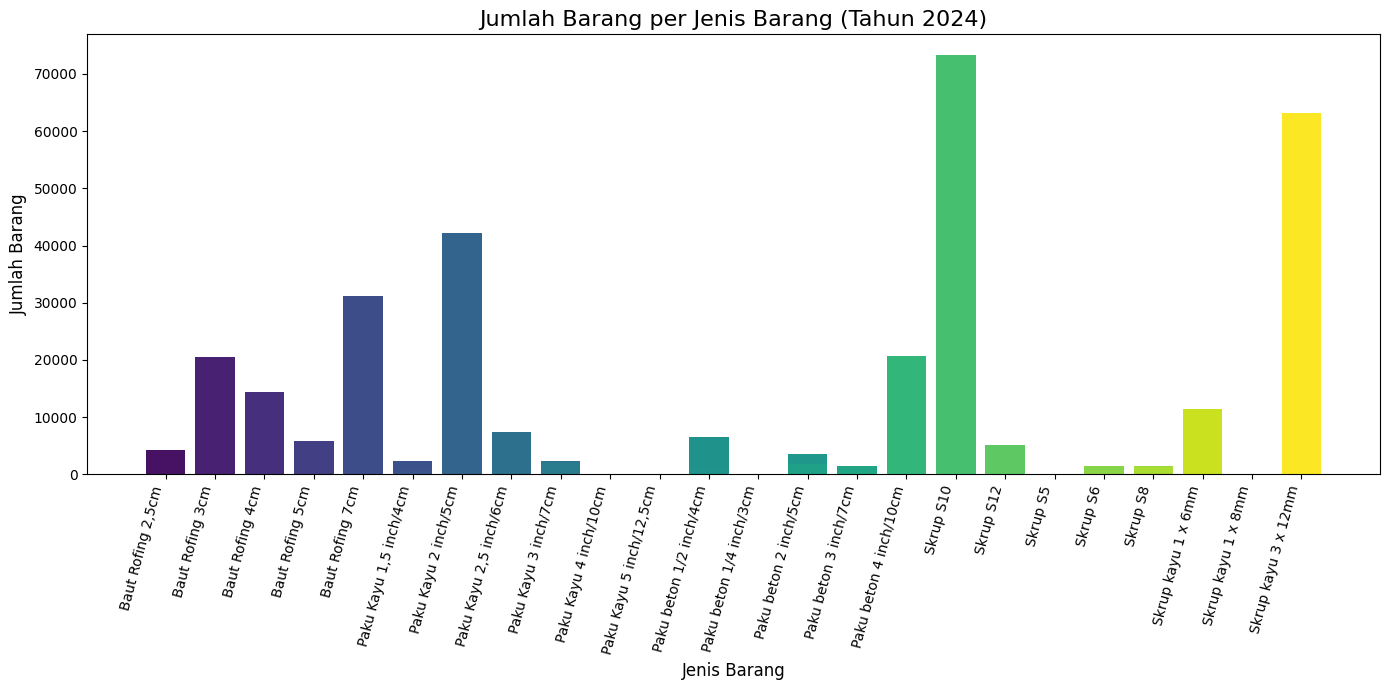

In [14]:
plt.figure(figsize=(14, 7))
bars = plt.bar(df_grouped_tahun['jenis_barang'], df_grouped_tahun['jumlah_barang'], 
               color=sns.color_palette("viridis", len(df_grouped_tahun)))
plt.xticks(rotation=75, ha='right')
plt.title('Jumlah Barang per Jenis Barang (Tahun 2024)', fontsize=16)
plt.xlabel('Jenis Barang', fontsize=12)
plt.ylabel('Jumlah Barang', fontsize=12)
plt.grid(False)

plt.tight_layout()
plt.show()

In [15]:
# Membuat dataframe jumlah barang per jenis_barang dan per jenis pemesanan
df_grouped_pemesanan = df.groupby(['jenis_barang', 'PEMESANAN'])['jumlah_barang'].sum().reset_index()
df_grouped_pemesanan

,jenis_barang,PEMESANAN,jumlah_barang
0,"Baut Rofing 2,5cm",BLIBLI,1265
1,"Baut Rofing 2,5cm",BUKALAPAK,2115
2,"Baut Rofing 2,5cm",LAZADA,973
3,"Baut Rofing 2,5cm",PESANAN OFFLINE,607
4,"Baut Rofing 2,5cm",SHOPEE,2973
...,...,...,...
144,Skrup kayu 3 x 12mm,LAZADA,20110
145,Skrup kayu 3 x 12mm,PESANAN OFFLINE,22348
146,Skrup kayu 3 x 12mm,SHOPEE,34890
147,Skrup kayu 3 x 12mm,TOKOPEDIA,34879


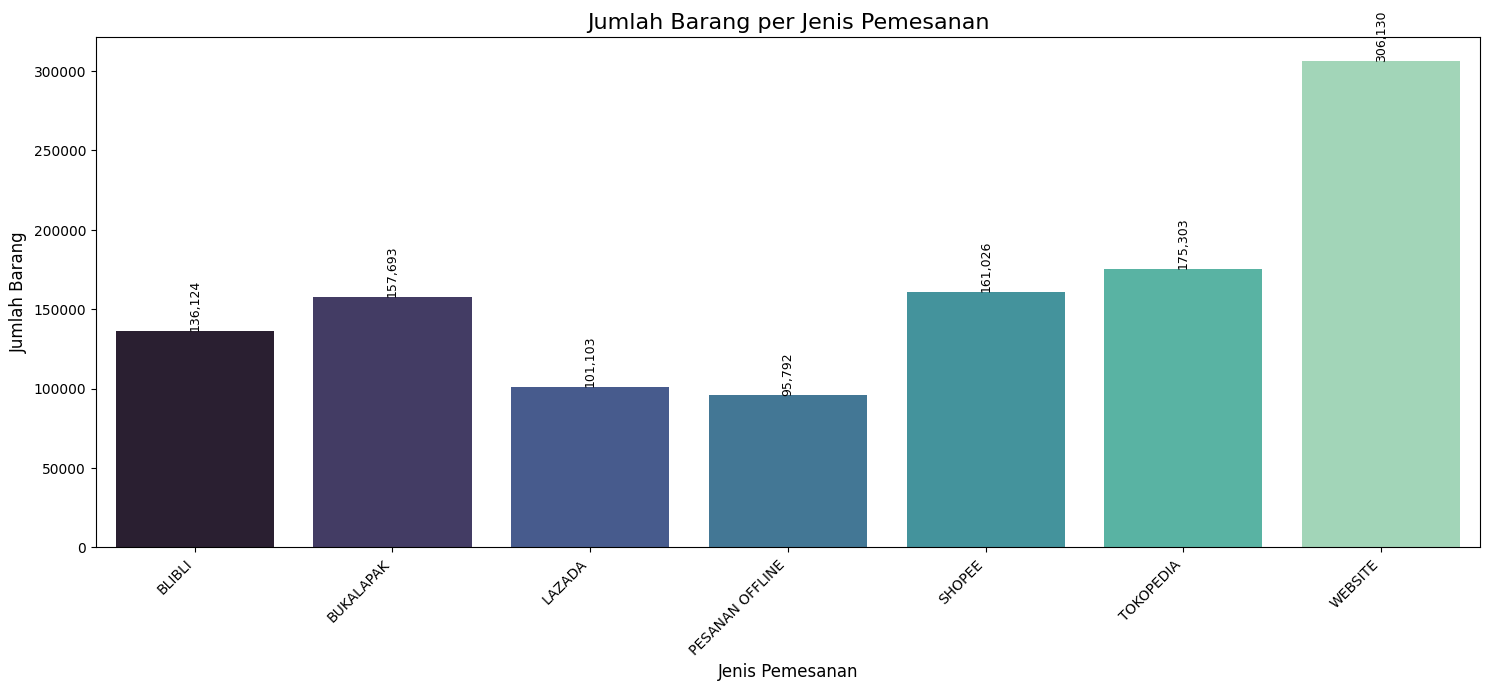

In [27]:
plt.figure(figsize=(15, 7))
ax = sns.barplot(
    data=df_grouped_pemesanan,
    x='PEMESANAN',
    y='jumlah_barang',
    estimator=sum,
    ci=None,
    palette='mako'
)

plt.title('Jumlah Barang per Jenis Pemesanan', fontsize=16)
plt.xlabel('Jenis Pemesanan', fontsize=12)
plt.ylabel('Jumlah Barang', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(False)

# Tambahkan angka di atas setiap bar
for p in ax.patches:
    height = int(p.get_height())
    if height > 0:
        ax.annotate(f'{height:,}', 
                    (p.get_x() + p.get_width() / 2, height),
                    ha='center', va='bottom', fontsize=9, rotation=90)


plt.tight_layout()
plt.show()

# PRA PEMROSESAN DATA

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28526 entries, 0 to 28525
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   barcode_kemasan     28526 non-null  object        
 1   jenis_barang        28526 non-null  object        
 2   jumlah_barang       28526 non-null  int64         
 3   PEMESANAN           28526 non-null  object        
 4   NOMOR_PEMESANAN     28526 non-null  object        
 5   status              28526 non-null  object        
 6   area_pengiriman     28526 non-null  object        
 7   tanggal_pengiriman  28383 non-null  datetime64[ns]
 8   harga_per_pack      28526 non-null  int64         
 9   jumlah_harga        28526 non-null  int64         
 10  petugas_1           27240 non-null  object        
 11  tahun_pengiriman    28383 non-null  float64       
 12  bulan_pengambilan   28383 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(3), ob

In [29]:
# Menyimpan hanya kolom jumlah_barang, jenis_barang, dan tanggal_pengiriman
df_run = df[['jumlah_barang', 'jenis_barang', 'tanggal_pengiriman']].copy()
df_run.head()

,jumlah_barang,jenis_barang,tanggal_pengiriman
0,25,Skrup S10,2024-01-22
1,25,Skrup S10,2024-01-22
2,25,Skrup kayu 3 x 12mm,2024-01-22
3,25,Skrup kayu 3 x 12mm,2024-01-22
4,25,Skrup kayu 3 x 12mm,2024-01-22


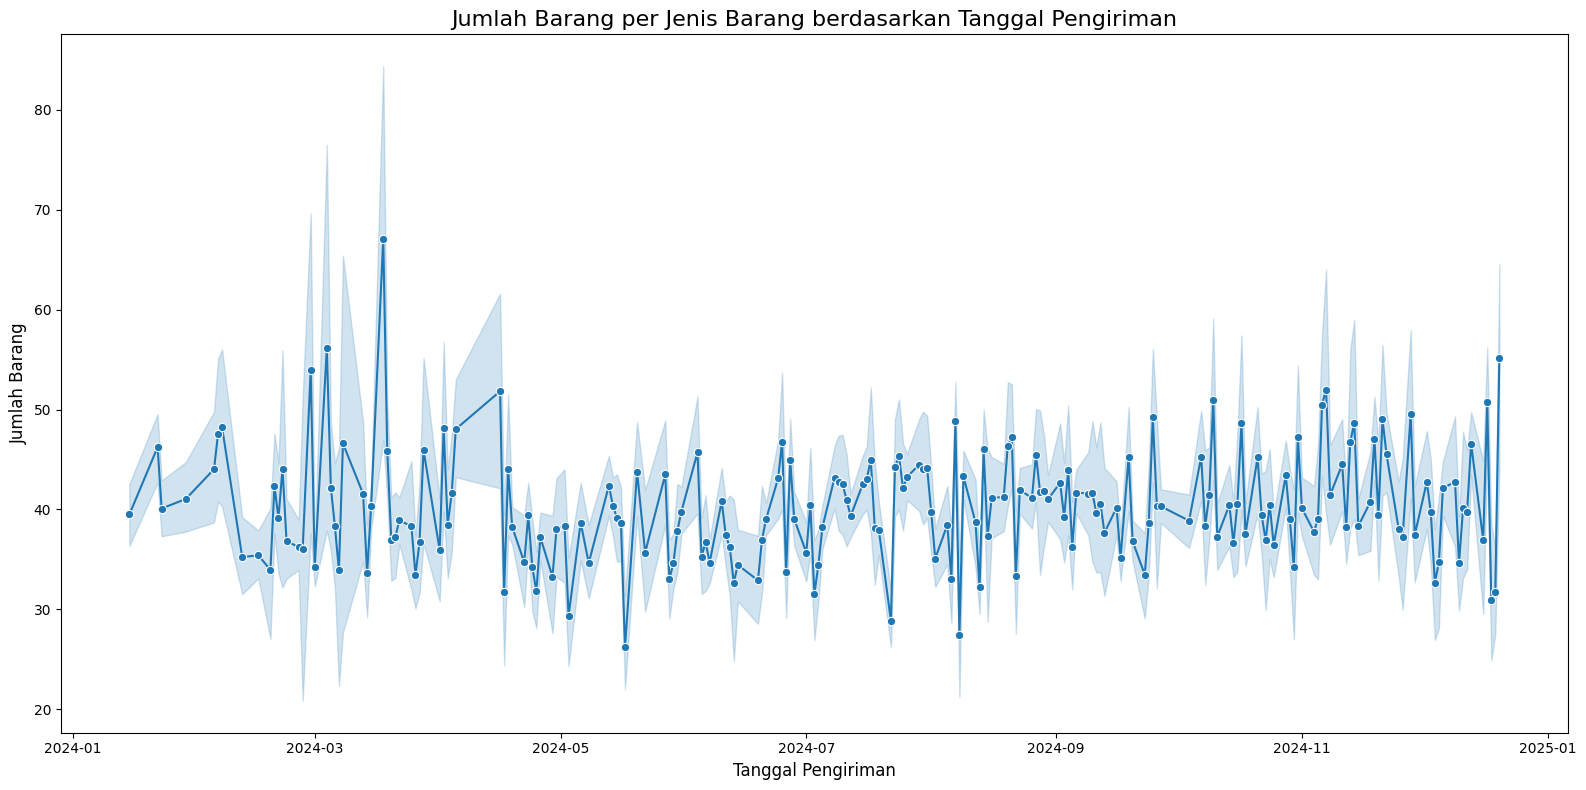

In [32]:
plt.figure(figsize=(16, 8))
sns.lineplot(
    data=df_run.dropna(subset=['tanggal_pengiriman']),
    x='tanggal_pengiriman',
    y='jumlah_barang',
    #hue='jenis_barang',
    marker='o'
)
plt.title('Jumlah Barang per Jenis Barang berdasarkan Tanggal Pengiriman', fontsize=16)
plt.xlabel('Tanggal Pengiriman', fontsize=12)
plt.ylabel('Jumlah Barang', fontsize=12)
plt.tight_layout()
plt.show()

In [33]:
# menghilangkan baris yang memiliki nilai NaN pada kolom tanggal_pengiriman
df_run= df_run.dropna(subset=['tanggal_pengiriman'])
# Mengubah kolom tanggal_pengiriman menjadi tipe datetime
df_run['tanggal_pengiriman'] = pd.to_datetime(df_run['tanggal_pengiriman'], format='%Y-%m-%d')
# Mengatur kolom tanggal_pengiriman sebagai index
df_run.set_index('tanggal_pengiriman', inplace=True)


In [34]:
df_run

,jumlah_barang,jenis_barang
tanggal_pengiriman,,
2024-01-22,25,Skrup S10
2024-01-22,25,Skrup S10
2024-01-22,25,Skrup kayu 3 x 12mm
2024-01-22,25,Skrup kayu 3 x 12mm
2024-01-22,25,Skrup kayu 3 x 12mm
...,...,...
2024-12-20,43,Skrup S10
2024-12-20,92,Baut Rofing 5cm
2024-12-20,70,Baut Rofing 7cm


# MODELLING

In [126]:
# Langkah-langkah modelling ARIMA per jenis_barang

# 1. Pilih salah satu jenis_barang untuk contoh, misal 'Skrup S10'
jenis = 'Skrup S10'
data_jenis = df_run[df_run['jenis_barang'] == jenis]['jumlah_barang'].resample('W').sum().fillna(0)

In [127]:
data_jenis.head()

tanggal_pengiriman
2024-01-21    2804
2024-01-28    8193
2024-02-04    2358
2024-02-11    1921
2024-02-18    7889
Freq: W-SUN, Name: jumlah_barang, dtype: int64

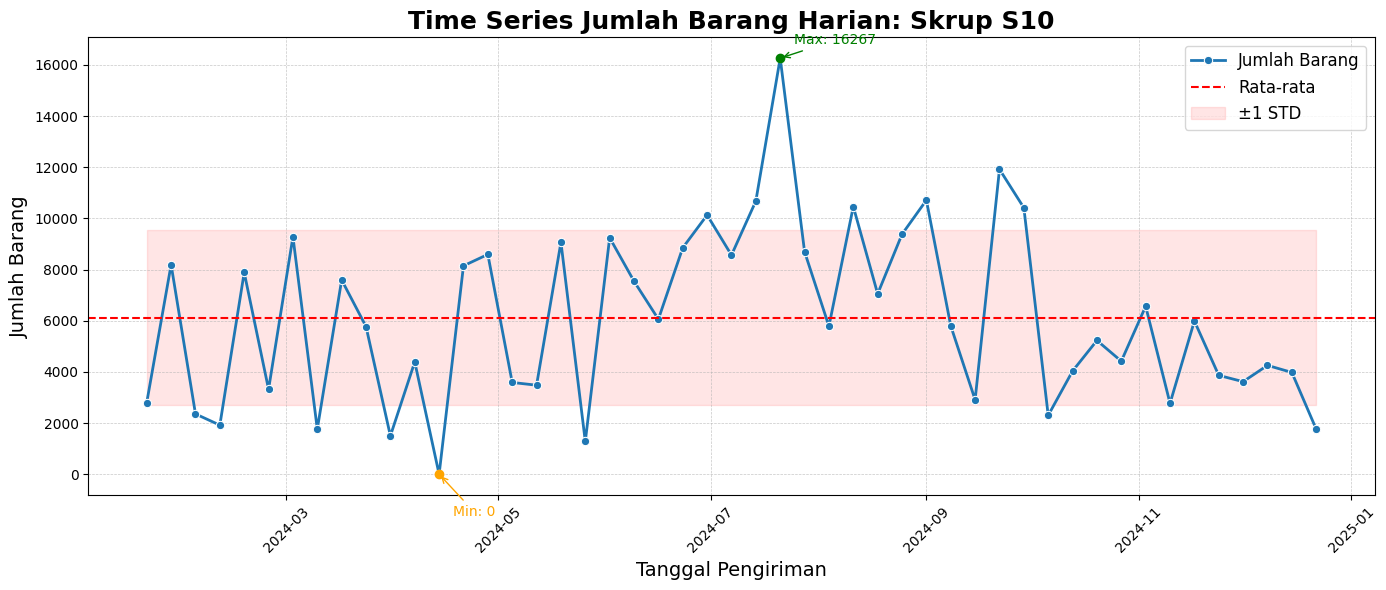

In [128]:
# 2. Visualisasi data
plt.figure(figsize=(14, 6))
sns.lineplot(
    data=data_jenis,
    marker='o',
    linewidth=2,
    color='tab:blue',
    label='Jumlah Barang'
)
plt.title(f'Time Series Jumlah Barang Harian: {jenis}', fontsize=18, fontweight='bold')
plt.xlabel('Tanggal Pengiriman', fontsize=14)
plt.ylabel('Jumlah Barang', fontsize=14)
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()

# Highlight mean and std
mean_val = data_jenis.mean()
std_val = data_jenis.std()
plt.axhline(mean_val, color='red', linestyle='--', linewidth=1.5, label='Rata-rata')
plt.fill_between(data_jenis.index, mean_val-std_val, mean_val+std_val, color='red', alpha=0.1, label='±1 STD')

# Annotate max/min
max_idx = data_jenis.idxmax()
min_idx = data_jenis.idxmin()
plt.scatter([max_idx], [data_jenis.max()], color='green', zorder=5)
plt.scatter([min_idx], [data_jenis.min()], color='orange', zorder=5)
plt.annotate(f'Max: {data_jenis.max()}', xy=(max_idx, data_jenis.max()), xytext=(10, 10),
             textcoords='offset points', arrowprops=dict(arrowstyle='->', color='green'), color='green')
plt.annotate(f'Min: {data_jenis.min()}', xy=(min_idx, data_jenis.min()), xytext=(10, -30),
             textcoords='offset points', arrowprops=dict(arrowstyle='->', color='orange'), color='orange')

plt.legend(fontsize=12)
plt.show()

In [129]:
# 3. Tes Stasioneritas (ADF Test)
adf_result = adfuller(data_jenis)
print('ADF Statistic:', adf_result[0])
print('p-value:', adf_result[1])
if adf_result[1] < 0.05:
    print('Data stasioner')
else:
    print('Data tidak stasioner')

ADF Statistic: -2.0116287681827694
p-value: 0.28149768135087555
Data tidak stasioner


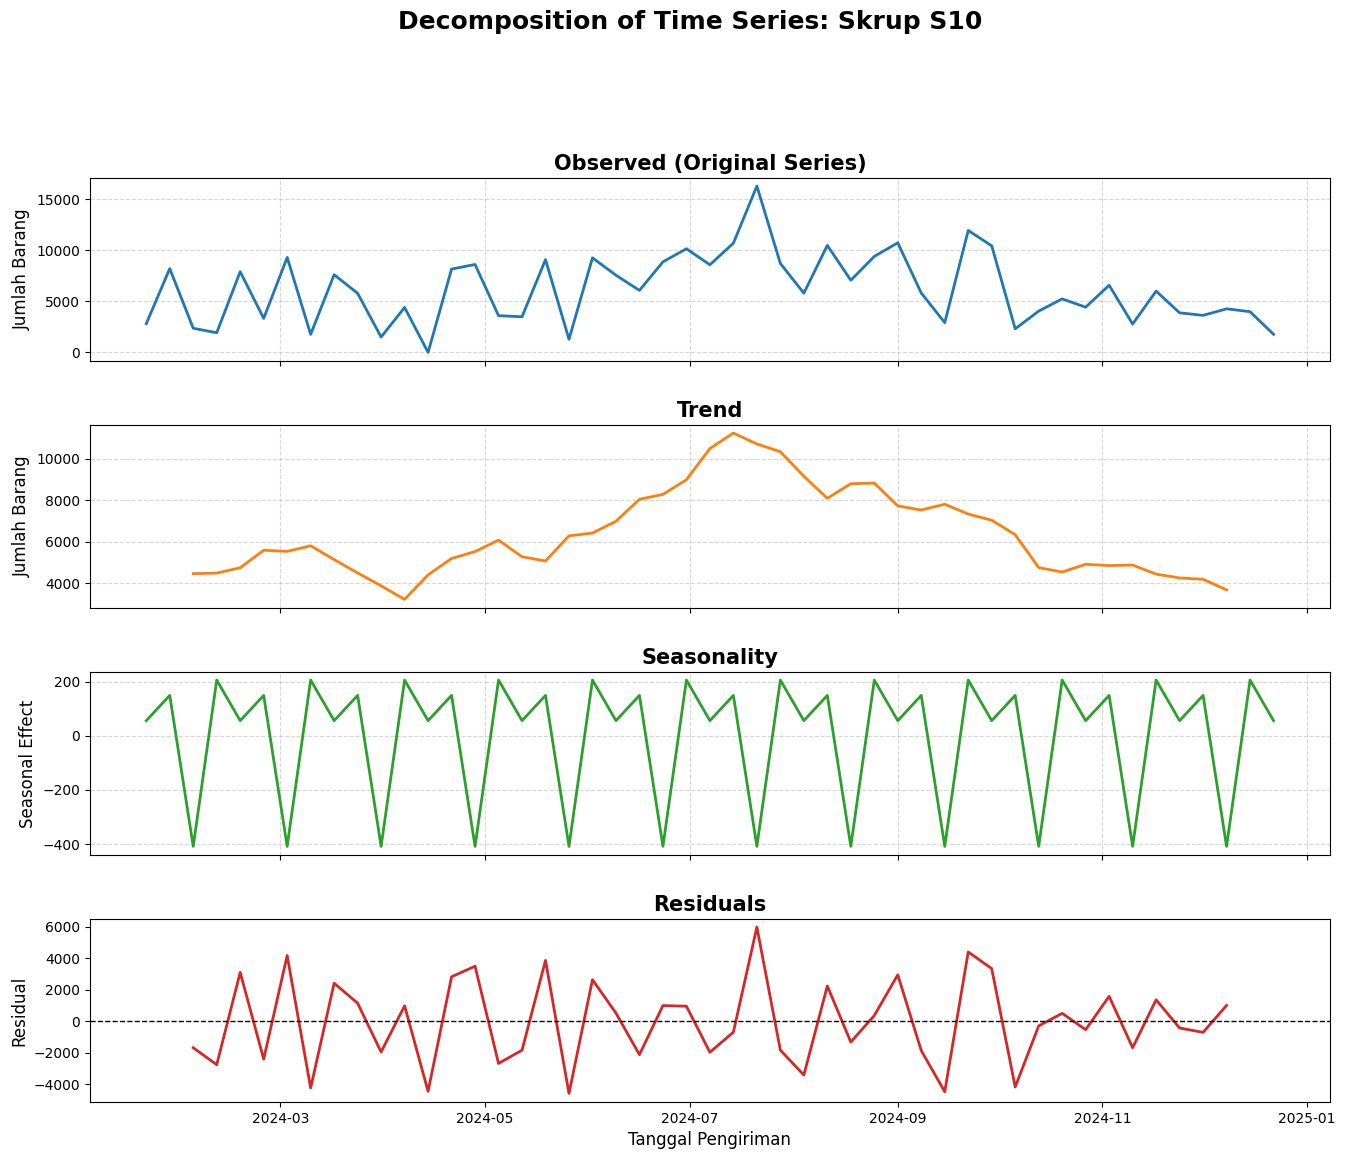

In [130]:
# 4. Decompose Trend & Seasonality
decompose_result = seasonal_decompose(data_jenis, model='additive', period=4) 
components = decompose_result
fig, axes = plt.subplots(4, 1, figsize=(16, 12), sharex=True, gridspec_kw={'hspace': 0.35})

# Observed
axes[0].plot(components.observed, color='tab:blue', linewidth=2)
axes[0].set_title('Observed (Original Series)', fontsize=15, fontweight='bold')
axes[0].set_ylabel('Jumlah Barang', fontsize=12)
axes[0].grid(True, linestyle='--', alpha=0.5)

# Trend
axes[1].plot(components.trend, color='tab:orange', linewidth=2)
axes[1].set_title('Trend', fontsize=15, fontweight='bold')
axes[1].set_ylabel('Jumlah Barang', fontsize=12)
axes[1].grid(True, linestyle='--', alpha=0.5)

# Seasonality
axes[2].plot(components.seasonal, color='tab:green', linewidth=2)
axes[2].set_title('Seasonality', fontsize=15, fontweight='bold')
axes[2].set_ylabel('Seasonal Effect', fontsize=12)
axes[2].grid(True, linestyle='--', alpha=0.5)

# Residual
axes[3].plot(components.resid, color='tab:red', linewidth=2)
axes[3].set_title('Residuals', fontsize=15, fontweight='bold')
axes[3].set_ylabel('Residual', fontsize=12)
axes[3].set_xlabel('Tanggal Pengiriman', fontsize=12)
axes[3].grid(True, linestyle='--', alpha=0.5)

# Highlight mean line for residuals
axes[3].axhline(0, color='black', linestyle='--', linewidth=1)

plt.suptitle(f'Decomposition of Time Series: {jenis}', fontsize=18, fontweight='bold', y=1.02)
plt.tight_layout()
plt.grid(False)
plt.show()

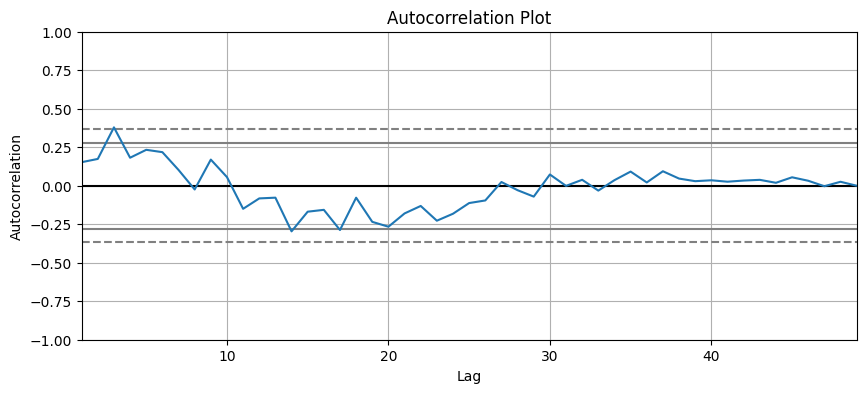

In [131]:
# 5. Tes Autokorelasi
plt.figure(figsize=(10,4))
autocorrelation_plot(data_jenis)
plt.title('Autocorrelation Plot')
plt.show()

In [132]:
# 6. Jika tidak stasioner, lakukan differencing
if adf_result[1] >= 0.05:
    data_diff = data_jenis.diff().dropna()
    adf_result_diff = adfuller(data_diff)
    print('ADF Statistic (differenced):', adf_result_diff[0])
    print('p-value (differenced):', adf_result_diff[1])
    if adf_result_diff[1] < 0.05:
        print('Data sudah stasioner setelah differencing')
    else:
        print('Data masih tidak stasioner')
else:
    data_diff = data_jenis
    print('Data sudah stasioner, tidak perlu differencing')

ADF Statistic (differenced): -10.057245523138006
p-value (differenced): 1.3627853220655015e-17
Data sudah stasioner setelah differencing


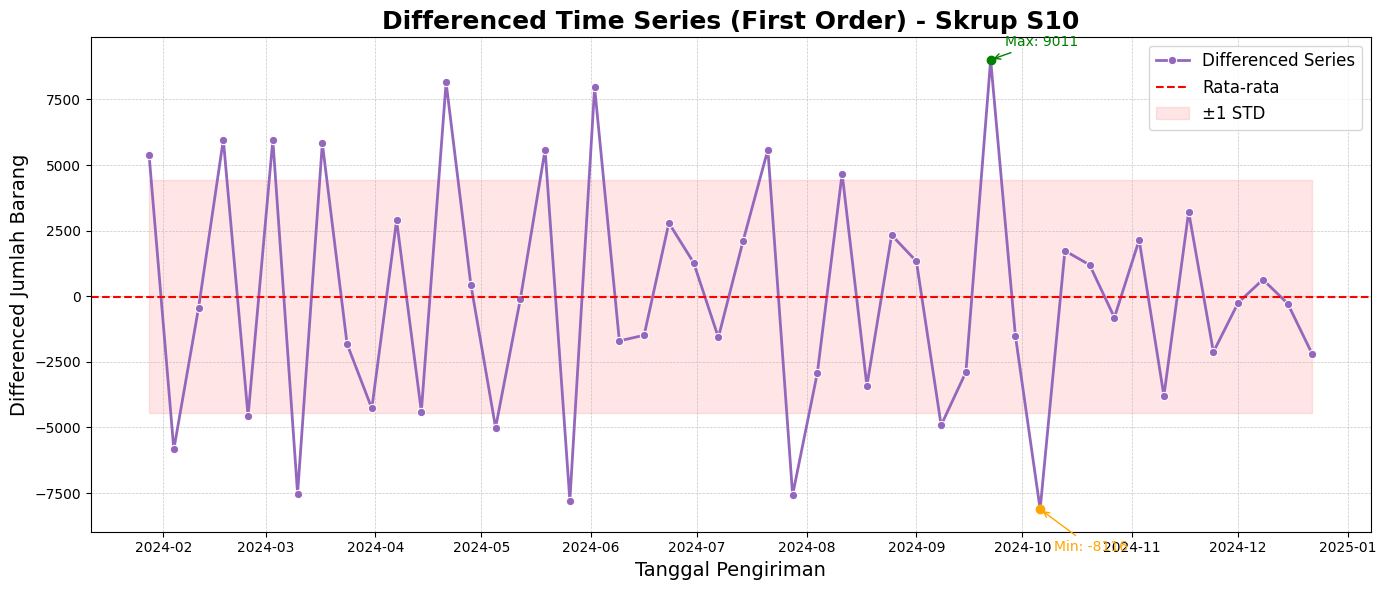

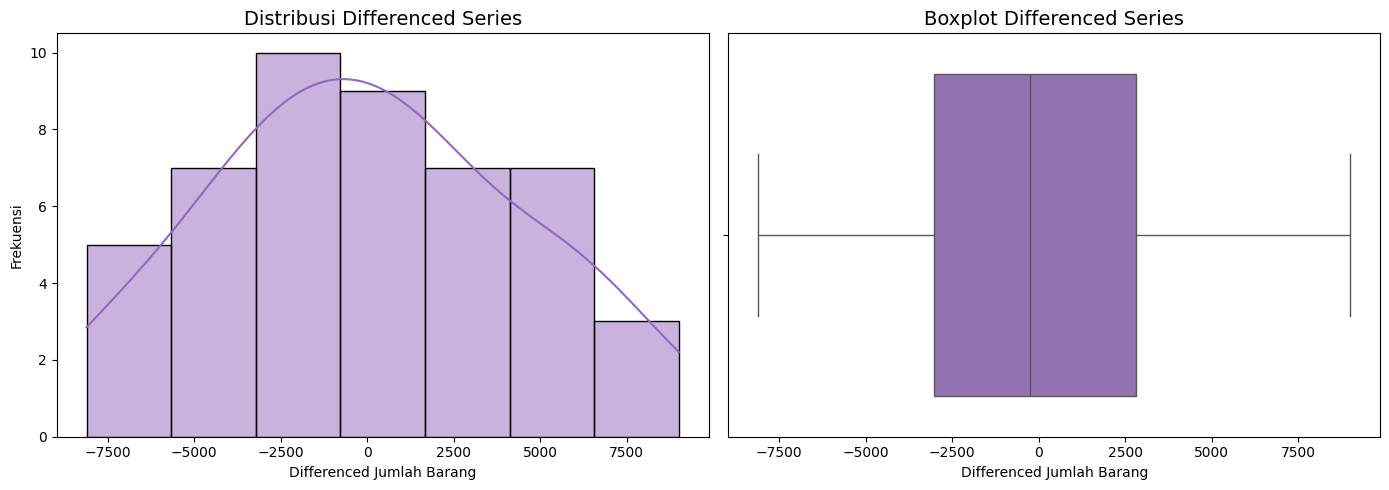

In [133]:
plt.figure(figsize=(14, 6))
sns.lineplot(
    data=data_diff,
    marker='o',
    linewidth=2,
    color='tab:purple',
    label='Differenced Series'
)
plt.title(f'Differenced Time Series (First Order) - {jenis}', fontsize=18, fontweight='bold')
plt.xlabel('Tanggal Pengiriman', fontsize=14)
plt.ylabel('Differenced Jumlah Barang', fontsize=14)
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)

# Highlight mean and ±1 std
mean_diff = data_diff.mean()
std_diff = data_diff.std()
plt.axhline(mean_diff, color='red', linestyle='--', linewidth=1.5, label='Rata-rata')
plt.fill_between(data_diff.index, mean_diff-std_diff, mean_diff+std_diff, color='red', alpha=0.1, label='±1 STD')

# Annotate max/min
max_idx = data_diff.idxmax()
min_idx = data_diff.idxmin()
plt.scatter([max_idx], [data_diff.max()], color='green', zorder=5)
plt.scatter([min_idx], [data_diff.min()], color='orange', zorder=5)
plt.annotate(f'Max: {data_diff.max():.0f}', xy=(max_idx, data_diff.max()), xytext=(10, 10),
             textcoords='offset points', arrowprops=dict(arrowstyle='->', color='green'), color='green')
plt.annotate(f'Min: {data_diff.min():.0f}', xy=(min_idx, data_diff.min()), xytext=(10, -30),
             textcoords='offset points', arrowprops=dict(arrowstyle='->', color='orange'), color='orange')

plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

# Distribusi dan boxplot
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
sns.histplot(data_diff, kde=True, ax=axes[0], color='tab:purple')
axes[0].set_title('Distribusi Differenced Series', fontsize=14)
axes[0].set_xlabel('Differenced Jumlah Barang')
axes[0].set_ylabel('Frekuensi')

sns.boxplot(x=data_diff, ax=axes[1], color='tab:purple')
axes[1].set_title('Boxplot Differenced Series', fontsize=14)
axes[1].set_xlabel('Differenced Jumlah Barang')

plt.tight_layout()
plt.show()

In [146]:
# 7. Auto ARIMA untuk menentukan parameter terbaik
model_auto = auto_arima(data_diff, seasonal=True, trace=True, m=30, suppress_warnings=True)
print(model_auto.summary())

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[30] intercept   : AIC=inf, Time=0.64 sec
 ARIMA(0,0,0)(0,0,0)[30] intercept   : AIC=945.498, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[30] intercept   : AIC=934.688, Time=0.08 sec
 ARIMA(0,0,1)(0,0,1)[30] intercept   : AIC=921.402, Time=0.10 sec
 ARIMA(0,0,0)(0,0,0)[30]             : AIC=943.499, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[30] intercept   : AIC=920.001, Time=0.02 sec
 ARIMA(0,0,1)(1,0,0)[30] intercept   : AIC=921.407, Time=0.11 sec
 ARIMA(0,0,1)(1,0,1)[30] intercept   : AIC=923.402, Time=0.22 sec
 ARIMA(1,0,1)(0,0,0)[30] intercept   : AIC=920.714, Time=0.03 sec
 ARIMA(0,0,2)(0,0,0)[30] intercept   : AIC=919.146, Time=0.10 sec
 ARIMA(0,0,2)(1,0,0)[30] intercept   : AIC=920.611, Time=0.42 sec
 ARIMA(0,0,2)(0,0,1)[30] intercept   : AIC=920.598, Time=0.52 sec
 ARIMA(0,0,2)(1,0,1)[30] intercept   : AIC=922.553, Time=0.91 sec
 ARIMA(1,0,2)(0,0,0)[30] intercept   : AIC=919.236, Time=0.12 sec
 ARIMA(0,0,3)(0,0,0)[30] intercept   

In [151]:
# 8. Fit model ARIMA
train = data_diff[:-30]
test = data_diff[-30:]
model = SARIMAX(data_diff, order=model_auto.order, seasonal_order=model_auto.seasonal_order)
model_fit = model.fit(disp=False)
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:          jumlah_barang   No. Observations:                   48
Model:               SARIMAX(0, 0, 3)   Log Likelihood                -454.396
Date:                Sun, 01 Jun 2025   AIC                            916.792
Time:                        20:34:04   BIC                            924.277
Sample:                    01-28-2024   HQIC                           919.621
                         - 12-22-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9366      0.145     -6.468      0.000      -1.220      -0.653
ma.L2          0.0043      0.183      0.023      0.981      -0.354       0.363
ma.L3          0.2611      0.135      1.941      0.0

In [156]:
# Melakukan prediksi (in-sample prediction) pada seluruh data_diff
predicted_diff = model_fit.predict(start=data_diff.index[0], end=data_diff.index[-1])

# Inverse differencing untuk mendapatkan prediksi pada level aslinya
# Ambil nilai pertama dari data_jenis sebagai anchor
anchor = data_jenis.loc[data_diff.index[0]- pd.Timedelta(weeks=1)]
predicted_level = predicted_diff.cumsum() + anchor

# Tampilkan hasil prediksi level (asli)
print(predicted_level)

tanggal_pengiriman
2024-01-28     2804.000000
2024-02-04      201.473446
2024-02-11     1823.315152
2024-02-18     4534.150810
2024-02-25     1114.528252
2024-03-03     1657.384375
2024-03-10    -2561.276910
2024-03-17      207.602503
2024-03-24    -1244.074715
2024-03-31    -1746.375623
2024-04-07     2569.487498
2024-04-14     3795.819818
2024-04-21     8069.147317
2024-04-28     4047.044832
2024-05-05    -1586.740299
2024-05-12    -1144.852522
2024-05-19      537.959094
2024-05-26    -2956.982047
2024-06-02      935.236882
2024-06-09    -1876.555305
2024-06-16    -4020.566199
2024-06-23    -3570.359440
2024-06-30    -5470.584391
2024-07-07    -8268.010288
2024-07-14    -8795.470105
2024-07-21   -10432.758161
2024-07-28   -16866.403581
2024-08-04   -15084.696661
2024-08-11    -8806.656126
2024-08-18    -7624.046673
2024-08-25    -4553.212805
2024-09-01    -4296.723494
2024-09-08    -6507.564640
2024-09-15    -4164.613394
2024-09-22     1006.874588
2024-09-29    -3317.225255
2024-10-0

In [137]:
# Menghitung confidence interval untuk out-of-sample forecast (dalam bentuk level/asli)

# Mendapatkan prediksi dan confidence interval dari model_fit
forecast_res = model_fit.get_forecast(steps=n_periods)
conf_int_diff = forecast_res.conf_int()  # interval pada differenced

# Mendapatkan prediksi differenced (mean)
forecast_mean_diff = forecast_res.predicted_mean

# Inverse differencing untuk mendapatkan interval pada level asli
# Ambil nilai terakhir dari data_jenis sebagai anchor
last_value = data_jenis.iloc[-1]

# Hitung cumulative sum untuk mean, lower, dan upper
forecast_level_mean = forecast_mean_diff.cumsum() + last_value
forecast_level_lower = conf_int_diff['lower jumlah_barang'].cumsum() + last_value
forecast_level_upper = conf_int_diff['upper jumlah_barang'].cumsum() + last_value

# Gabungkan hasil ke dalam DataFrame
conf_int_level = pd.DataFrame({
    'forecast': forecast_level_mean,
    'lower': forecast_level_lower,
    'upper': forecast_level_upper
})

print(conf_int_level)

               forecast          lower          upper
2024-12-29  3916.066618   -2045.399840    9877.533076
2025-01-05  3837.564115  -10291.744128   17966.872359
2025-01-12  3222.903337  -19074.286578   25520.093251
2025-01-19  3222.903337  -27389.103997   33834.910670
2025-01-26  3222.903337  -35703.921416   42149.728089
2025-02-02  3222.903337  -44018.738836   50464.545509
2025-02-09  3222.903337  -52333.556255   58779.362928
2025-02-16  3222.903337  -60648.373674   67094.180347
2025-02-23  3222.903337  -68963.191094   75408.997767
2025-03-02  3222.903337  -77278.008513   83723.815186
2025-03-09  3222.903337  -85592.825932   92038.632605
2025-03-16  3222.903337  -93907.643352  100353.450025
2025-03-23  3222.903337 -102222.460771  108668.267444
2025-03-30  3222.903337 -110537.278190  116983.084863


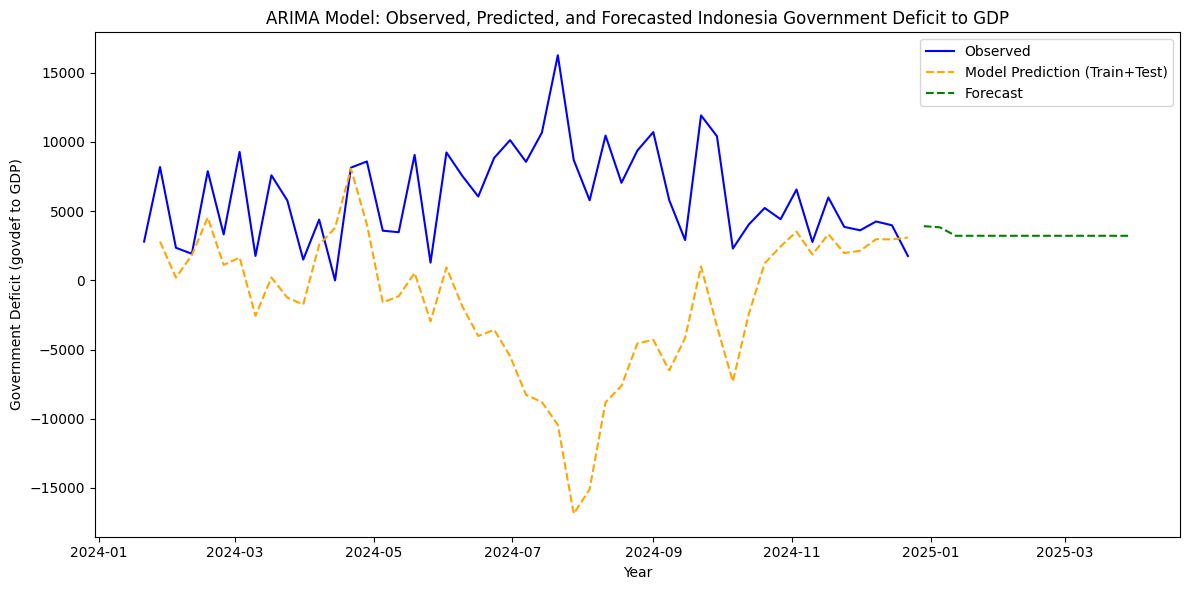

In [157]:
# Step 7: Forecasting
# -------------------
# Visualization: Observed, In-sample Prediction, Out-of-sample Forecast
plt.figure(figsize=(12, 6))
# Plot observed series
plt.plot(data_jenis, label='Observed', color='blue')

# Melakukan prediksi (in-sample prediction) pada seluruh data_diff
predicted_diff = model_fit.predict(start=data_diff.index[0], end=data_diff.index[-1])

# Inverse differencing untuk mendapatkan prediksi pada level aslinya
# Ambil nilai pertama dari data_jenis sebagai anchor
anchor = data_jenis.loc[data_diff.index[0]- pd.Timedelta(weeks=1)]
predicted_level = predicted_diff.cumsum() + anchor

plt.plot(data_jenis[1:].index, predicted_level, label='Model Prediction (Train+Test)', color='orange', linestyle='--')

# Out-of-sample forecast (future)
n_periods = 14
forecast_res = model_fit.get_forecast(steps=n_periods)
conf_int_diff = forecast_res.conf_int()  # interval pada differenced

# Mendapatkan prediksi differenced (mean)
forecast_mean_diff = forecast_res.predicted_mean

# Inverse differencing untuk mendapatkan interval pada level asli
# Ambil nilai terakhir dari data_jenis sebagai anchor
last_value = data_jenis.iloc[-1]

# Hitung cumulative sum untuk mean, lower, dan upper
forecast_level_mean = forecast_mean_diff.cumsum() + last_value
forecast_level_lower = conf_int_diff['lower jumlah_barang'].cumsum() + last_value
forecast_level_upper = conf_int_diff['upper jumlah_barang'].cumsum() + last_value

# Gabungkan hasil ke dalam DataFrame
conf_int_level = pd.DataFrame({
    'forecast': forecast_level_mean,
    'lower': forecast_level_lower,
    'upper': forecast_level_upper
})
# Plot out-of-sample forecast
forecast_index = pd.date_range(start=data_jenis.index[-1] + pd.Timedelta(weeks=1), periods=n_periods, freq='W')
plt.plot(forecast_index, conf_int_level['forecast'], label='Forecast', color='green', linestyle='--')
#plt.fill_between(forecast_index, conf_int_level['lower'], conf_int_level['upper'], color='green', alpha=0.2, label='95% Confidence Interval')

'''
# Annotate each forecast point with its value
for x, y in zip(forecast_index, forecast_values):
    plt.annotate(f"{y:.2f}", (x, y), textcoords="offset points", xytext=(0,8), ha='center', fontsize=9, color='green')
'''
    
plt.title('ARIMA Model: Observed, Predicted, and Forecasted Indonesia Government Deficit to GDP')
plt.xlabel('Year')
plt.ylabel('Government Deficit (govdef to GDP)')
plt.legend()
plt.grid(False)
plt.tight_layout()
plt.show()

Model Evaluation on Test Set:
Mean Absolute Error (MAE): 8340.9960
Root Mean Squared Error (RMSE): 10756.0650
R-squared (R2): -9.0269


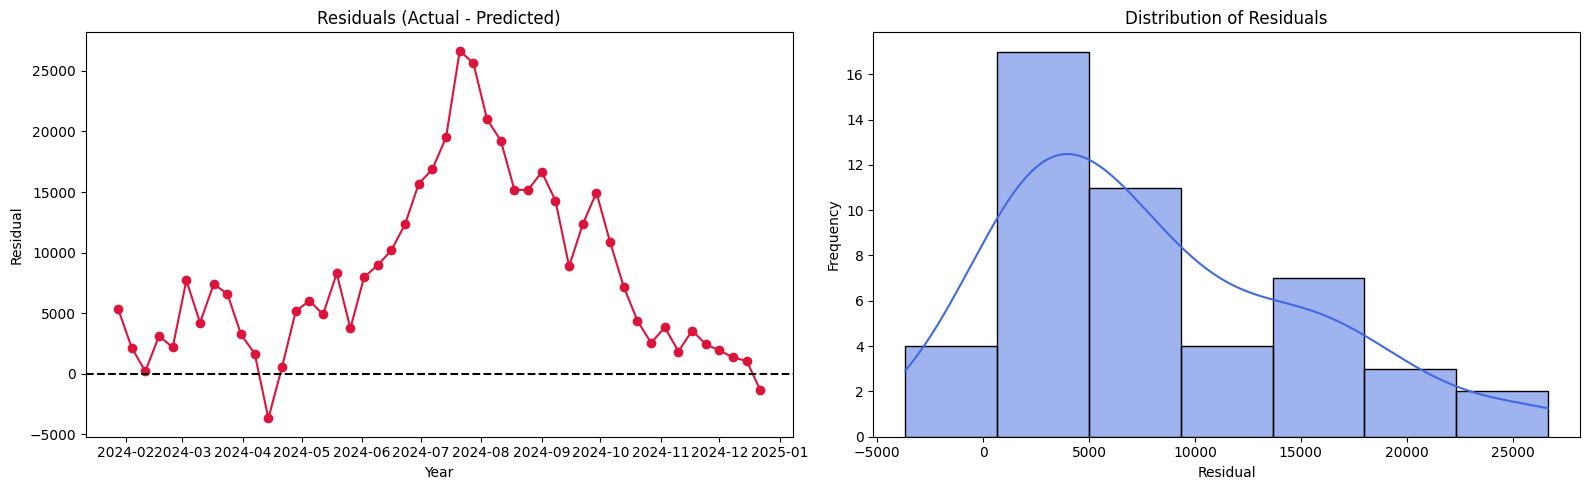

In [115]:
# Step 9: Model Evaluation
# ------------------------
# Evaluate the ARIMA model using multiple metrics and residual analysis

# Melakukan prediksi (in-sample prediction) pada seluruh data_diff
predicted_diff = model_fit.predict(start=data_diff.index[0], end=data_diff.index[-1])
# Inverse differencing untuk mendapatkan prediksi pada level aslinya
# Ambil nilai pertama dari data_jenis sebagai anchor
anchor = data_jenis.loc[data_diff.index[0] - pd.Timedelta(weeks=1)]
pred_test = predicted_diff.cumsum() + anchor
actual_test = data_jenis[1:]

# 2. Evaluation Metrics
mse = mean_squared_error(actual_test, pred_test)
rmse = np.sqrt(mse)
mae = mean_absolute_error(actual_test, pred_test)
r2 = r2_score(actual_test, pred_test)

print("Model Evaluation on Test Set:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R2): {r2:.4f}")

# 3. Residual Analysis
residuals = actual_test - pred_test

plt.figure(figsize=(16, 5))
plt.subplot(1, 2, 1)
plt.plot(data_jenis[1:].index, residuals, marker='o', linestyle='-', color='crimson')
plt.axhline(0, color='black', linestyle='--')
plt.title('Residuals (Actual - Predicted)')
plt.xlabel('Year')
plt.ylabel('Residual')
plt.grid(False)

plt.subplot(1, 2, 2)
sns.histplot(residuals, kde=True, color='royalblue')
plt.title('Distribution of Residuals')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.grid(False)

plt.tight_layout()
plt.show()


# DATA HARIAN

In [158]:
# Langkah-langkah modelling ARIMA per jenis_barang

# 1. Pilih salah satu jenis_barang untuk contoh, misal 'Skrup S10'
jenis = 'Skrup S10'
data_jenis = df_run[df_run['jenis_barang'] == jenis]['jumlah_barang'].resample('D').sum().fillna(0)

In [159]:
data_jenis.head()

tanggal_pengiriman
2024-01-15    2804
2024-01-16       0
2024-01-17       0
2024-01-18       0
2024-01-19       0
Freq: D, Name: jumlah_barang, dtype: int64

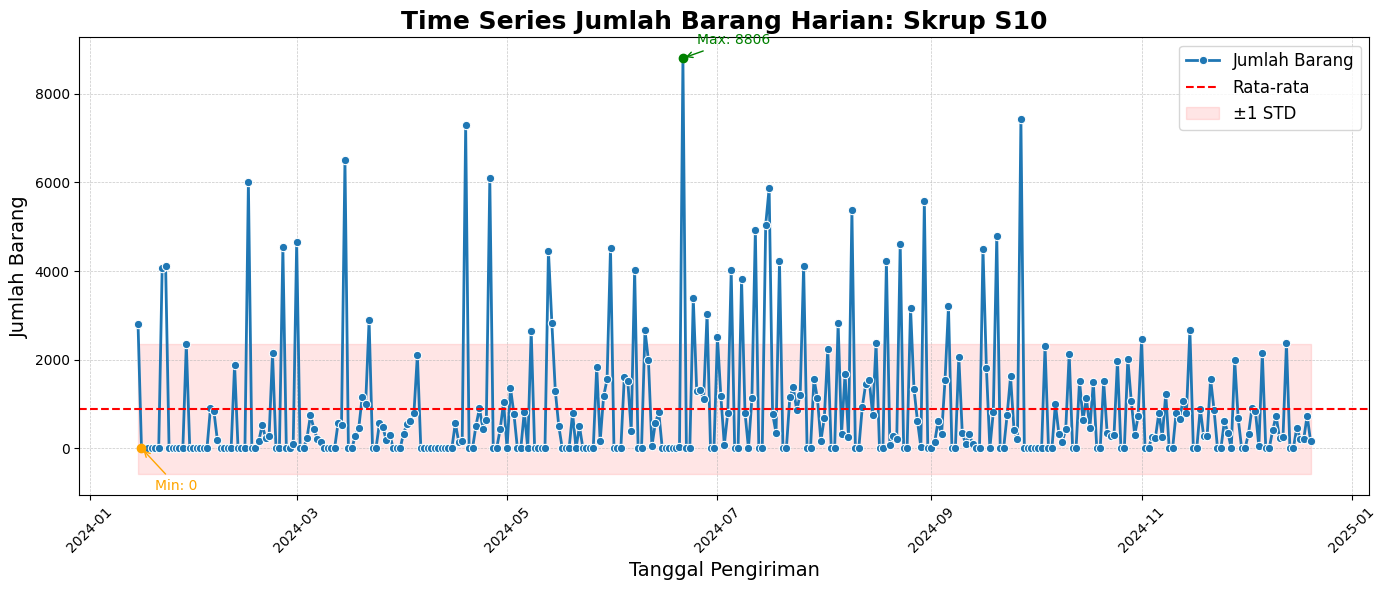

In [160]:
# 2. Visualisasi data
plt.figure(figsize=(14, 6))
sns.lineplot(
    data=data_jenis,
    marker='o',
    linewidth=2,
    color='tab:blue',
    label='Jumlah Barang'
)
plt.title(f'Time Series Jumlah Barang Harian: {jenis}', fontsize=18, fontweight='bold')
plt.xlabel('Tanggal Pengiriman', fontsize=14)
plt.ylabel('Jumlah Barang', fontsize=14)
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()

# Highlight mean and std
mean_val = data_jenis.mean()
std_val = data_jenis.std()
plt.axhline(mean_val, color='red', linestyle='--', linewidth=1.5, label='Rata-rata')
plt.fill_between(data_jenis.index, mean_val-std_val, mean_val+std_val, color='red', alpha=0.1, label='±1 STD')

# Annotate max/min
max_idx = data_jenis.idxmax()
min_idx = data_jenis.idxmin()
plt.scatter([max_idx], [data_jenis.max()], color='green', zorder=5)
plt.scatter([min_idx], [data_jenis.min()], color='orange', zorder=5)
plt.annotate(f'Max: {data_jenis.max()}', xy=(max_idx, data_jenis.max()), xytext=(10, 10),
             textcoords='offset points', arrowprops=dict(arrowstyle='->', color='green'), color='green')
plt.annotate(f'Min: {data_jenis.min()}', xy=(min_idx, data_jenis.min()), xytext=(10, -30),
             textcoords='offset points', arrowprops=dict(arrowstyle='->', color='orange'), color='orange')

plt.legend(fontsize=12)
plt.show()

In [161]:
# 3. Tes Stasioneritas (ADF Test)
adf_result = adfuller(data_jenis)
print('ADF Statistic:', adf_result[0])
print('p-value:', adf_result[1])
if adf_result[1] < 0.05:
    print('Data stasioner')
else:
    print('Data tidak stasioner')

ADF Statistic: -3.6471392463176717
p-value: 0.0049212049572087335
Data stasioner


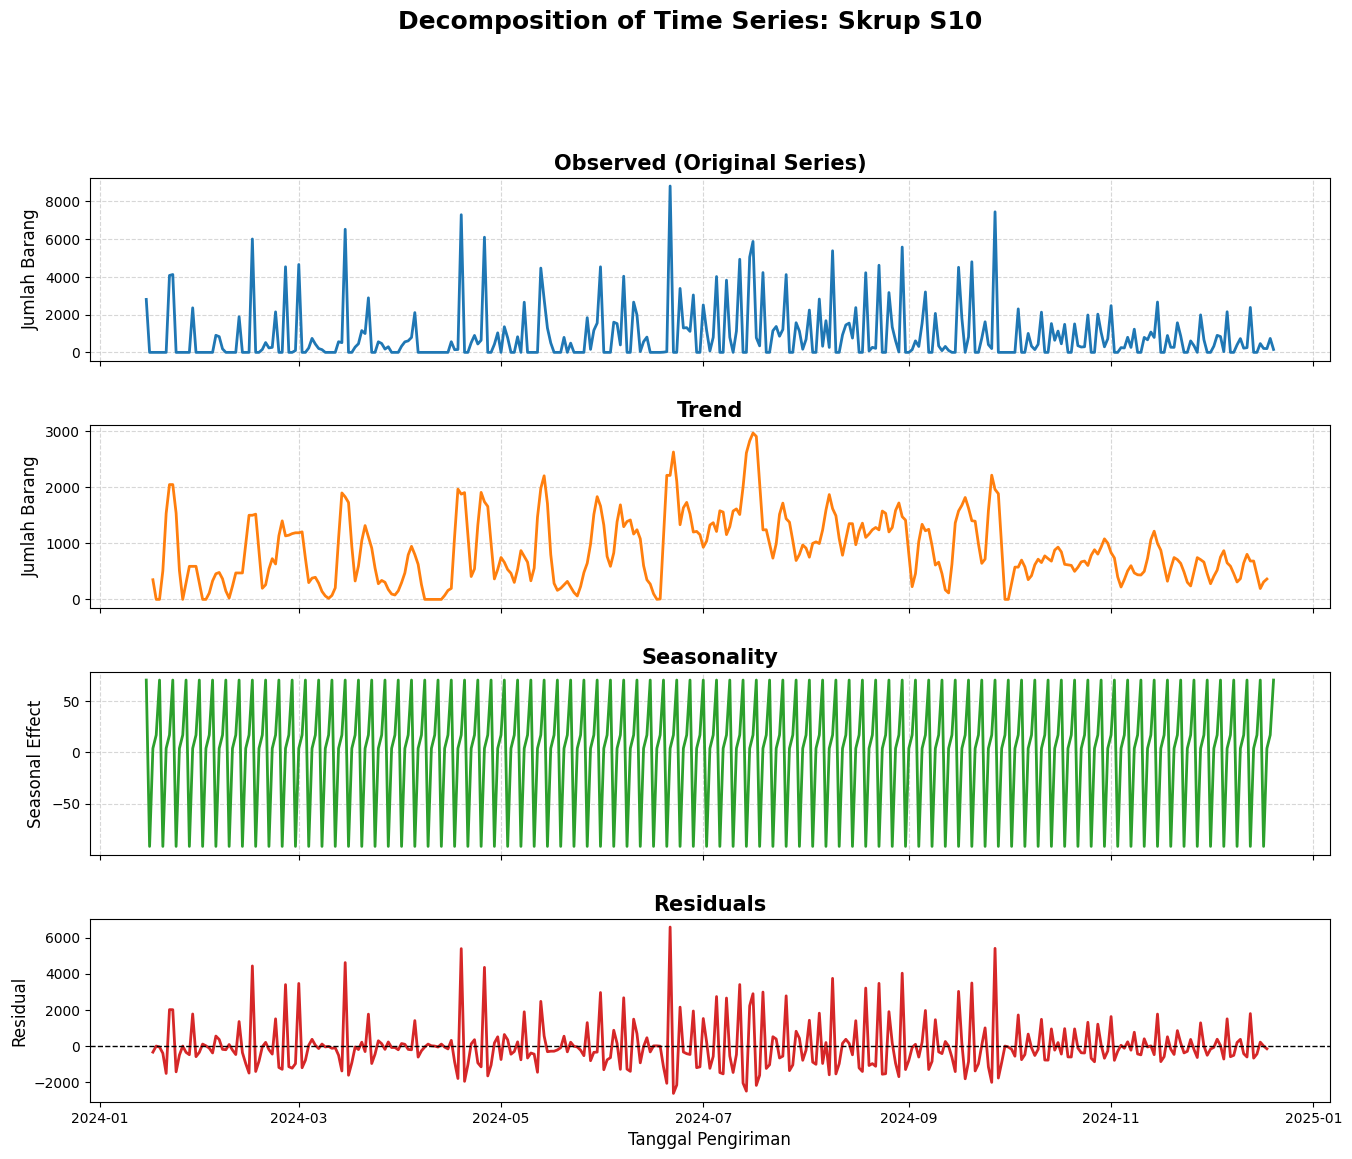

In [162]:
# 4. Decompose Trend & Seasonality
decompose_result = seasonal_decompose(data_jenis, model='additive', period=4) 
components = decompose_result
fig, axes = plt.subplots(4, 1, figsize=(16, 12), sharex=True, gridspec_kw={'hspace': 0.35})

# Observed
axes[0].plot(components.observed, color='tab:blue', linewidth=2)
axes[0].set_title('Observed (Original Series)', fontsize=15, fontweight='bold')
axes[0].set_ylabel('Jumlah Barang', fontsize=12)
axes[0].grid(True, linestyle='--', alpha=0.5)

# Trend
axes[1].plot(components.trend, color='tab:orange', linewidth=2)
axes[1].set_title('Trend', fontsize=15, fontweight='bold')
axes[1].set_ylabel('Jumlah Barang', fontsize=12)
axes[1].grid(True, linestyle='--', alpha=0.5)

# Seasonality
axes[2].plot(components.seasonal, color='tab:green', linewidth=2)
axes[2].set_title('Seasonality', fontsize=15, fontweight='bold')
axes[2].set_ylabel('Seasonal Effect', fontsize=12)
axes[2].grid(True, linestyle='--', alpha=0.5)

# Residual
axes[3].plot(components.resid, color='tab:red', linewidth=2)
axes[3].set_title('Residuals', fontsize=15, fontweight='bold')
axes[3].set_ylabel('Residual', fontsize=12)
axes[3].set_xlabel('Tanggal Pengiriman', fontsize=12)
axes[3].grid(True, linestyle='--', alpha=0.5)

# Highlight mean line for residuals
axes[3].axhline(0, color='black', linestyle='--', linewidth=1)

plt.suptitle(f'Decomposition of Time Series: {jenis}', fontsize=18, fontweight='bold', y=1.02)
plt.tight_layout()
plt.grid(False)
plt.show()

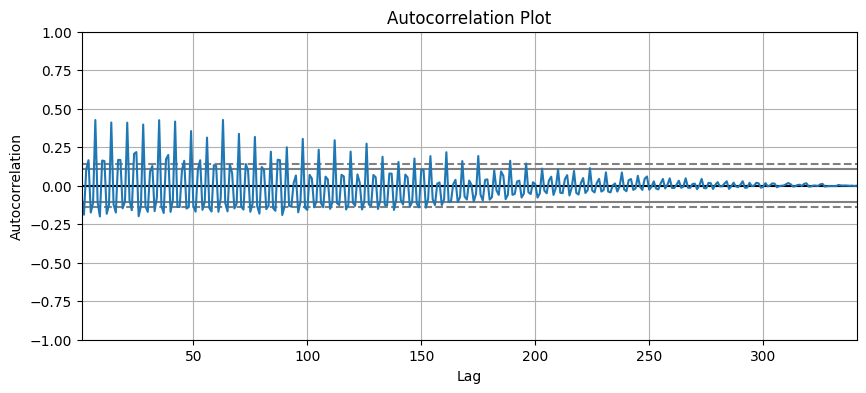

In [163]:
# 5. Tes Autokorelasi
plt.figure(figsize=(10,4))
autocorrelation_plot(data_jenis)
plt.title('Autocorrelation Plot')
plt.show()

In [164]:
# 6. Jika tidak stasioner, lakukan differencing
if adf_result[1] >= 0.05:
    data_diff = data_jenis.diff().dropna()
    adf_result_diff = adfuller(data_diff)
    print('ADF Statistic (differenced):', adf_result_diff[0])
    print('p-value (differenced):', adf_result_diff[1])
    if adf_result_diff[1] < 0.05:
        print('Data sudah stasioner setelah differencing')
    else:
        print('Data masih tidak stasioner')
else:
    data_diff = data_jenis
    print('Data sudah stasioner, tidak perlu differencing')

Data sudah stasioner, tidak perlu differencing


In [178]:
# 7. Auto ARIMA untuk menentukan parameter terbaik
model_auto = auto_arima(data_diff, seasonal=True, trace=True, m=7, suppress_warnings=True)
print(model_auto.summary())

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[7] intercept   : AIC=inf, Time=1.38 sec
 ARIMA(0,0,0)(0,0,0)[7] intercept   : AIC=5944.293, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[7] intercept   : AIC=5879.962, Time=0.40 sec
 ARIMA(0,0,1)(0,0,1)[7] intercept   : AIC=5907.249, Time=0.09 sec
 ARIMA(0,0,0)(0,0,0)[7]             : AIC=6047.190, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[7] intercept   : AIC=5944.504, Time=0.02 sec
 ARIMA(1,0,0)(2,0,0)[7] intercept   : AIC=5852.458, Time=1.02 sec
 ARIMA(1,0,0)(2,0,1)[7] intercept   : AIC=inf, Time=1.39 sec
 ARIMA(1,0,0)(1,0,1)[7] intercept   : AIC=5894.071, Time=0.65 sec
 ARIMA(0,0,0)(2,0,0)[7] intercept   : AIC=5851.005, Time=0.77 sec
 ARIMA(0,0,0)(1,0,0)[7] intercept   : AIC=5877.981, Time=0.32 sec
 ARIMA(0,0,0)(2,0,1)[7] intercept   : AIC=10.000, Time=6.07 sec
 ARIMA(0,0,0)(1,0,1)[7] intercept   : AIC=5856.345, Time=0.54 sec
 ARIMA(0,0,0)(2,0,2)[7] intercept   : AIC=inf, Time=1.56 sec
 ARIMA(0,0,0)(1,0,2)[7] intercept   : AIC=5879.121

In [179]:
# 8. Fit model ARIMA
train = data_diff[:-30]
test = data_diff[-30:]
model = SARIMAX(data_diff, order=model_auto.order, seasonal_order=model_auto.seasonal_order)
model_fit = model.fit(disp=False)
print(model_fit.summary())

                                 SARIMAX Results                                 
Dep. Variable:             jumlah_barang   No. Observations:                  341
Model:             SARIMAX(2, 0, [1], 7)   Log Likelihood               -2901.990
Date:                   Sun, 01 Jun 2025   AIC                           5811.980
Time:                           21:23:45   BIC                           5827.308
Sample:                       01-15-2024   HQIC                          5818.087
                            - 12-20-2024                                         
Covariance Type:                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L7        0.9509      0.047     20.266      0.000       0.859       1.043
ar.S.L14       0.0310      0.043      0.727      0.467      -0.052       0.114
ma.S.L7       -0.8152      0

In [180]:
# Melakukan prediksi (in-sample prediction) pada seluruh data_diff
predicted_diff = model_fit.predict(start=data_diff.index[0], end=data_diff.index[-1])

# Tampilkan hasil prediksi level (asli)
print(predicted_level)

tanggal_pengiriman
2024-01-28     2804.000000
2024-02-04      201.473446
2024-02-11     1823.315152
2024-02-18     4534.150810
2024-02-25     1114.528252
2024-03-03     1657.384375
2024-03-10    -2561.276910
2024-03-17      207.602503
2024-03-24    -1244.074715
2024-03-31    -1746.375623
2024-04-07     2569.487498
2024-04-14     3795.819818
2024-04-21     8069.147317
2024-04-28     4047.044832
2024-05-05    -1586.740299
2024-05-12    -1144.852522
2024-05-19      537.959094
2024-05-26    -2956.982047
2024-06-02      935.236882
2024-06-09    -1876.555305
2024-06-16    -4020.566199
2024-06-23    -3570.359440
2024-06-30    -5470.584391
2024-07-07    -8268.010288
2024-07-14    -8795.470105
2024-07-21   -10432.758161
2024-07-28   -16866.403581
2024-08-04   -15084.696661
2024-08-11    -8806.656126
2024-08-18    -7624.046673
2024-08-25    -4553.212805
2024-09-01    -4296.723494
2024-09-08    -6507.564640
2024-09-15    -4164.613394
2024-09-22     1006.874588
2024-09-29    -3317.225255
2024-10-0

In [186]:
n_periods = 14  # jumlah periode untuk prediksi ke depan
# Mendapatkan prediksi dan confidence interval dari model_fit
forecast = model_fit.get_forecast(steps=n_periods)
forecast_index = pd.date_range(start=data_jenis.index[-1], periods=n_periods, freq='D')
forecast_values = forecast.predicted_mean
print(forecast_values)
# forecast value with 2 decimal
forecast_values = forecast_values.round(2)
print(forecast_values)



2024-12-21   -2.043772e-15
2024-12-22   -2.942514e-15
2024-12-23    7.264203e+02
2024-12-24    5.218752e+02
2024-12-25    3.764284e+02
2024-12-26    6.174898e+02
2024-12-27    1.610861e+03
2024-12-28   -1.943507e-15
2024-12-29   -2.798157e-15
2024-12-30    7.051769e+02
2024-12-31    5.027112e+02
2025-01-01    3.641522e+02
2025-01-02    6.100103e+02
2025-01-03    1.536600e+03
Freq: D, Name: predicted_mean, dtype: float64
2024-12-21      -0.00
2024-12-22      -0.00
2024-12-23     726.42
2024-12-24     521.88
2024-12-25     376.43
2024-12-26     617.49
2024-12-27    1610.86
2024-12-28      -0.00
2024-12-29      -0.00
2024-12-30     705.18
2024-12-31     502.71
2025-01-01     364.15
2025-01-02     610.01
2025-01-03    1536.60
Freq: D, Name: predicted_mean, dtype: float64


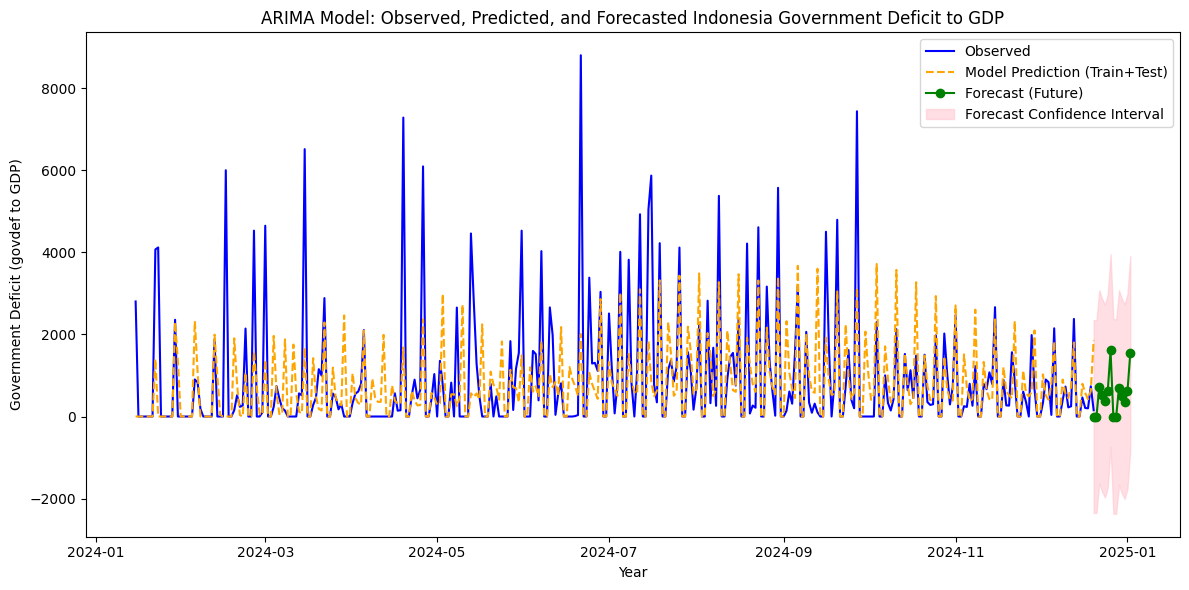

In [182]:
# Step 7: Forecasting
# -------------------
# Visualization: Observed, In-sample Prediction, Out-of-sample Forecast
plt.figure(figsize=(12, 6))
# Plot observed series
plt.plot(data_jenis, label='Observed', color='blue')

# Melakukan prediksi (in-sample prediction) pada seluruh data_diff
predicted_diff = model_fit.predict(start=data_diff.index[0], end=data_diff.index[-1])

plt.plot(data_jenis.index, predicted_diff, label='Model Prediction (Train+Test)', color='orange', linestyle='--')

# Forecast the next 
n_periods = 14  
forecast = model_fit.get_forecast(steps=n_periods)
forecast_index = pd.date_range(start=data_jenis.index[-1], periods=n_periods, freq='D')
forecast_values = forecast.predicted_mean
plt.plot(forecast_index, forecast_values, label='Forecast (Future)', marker='o', color='green')

# Confidence interval for forecast
conf_int = forecast.conf_int()
plt.fill_between(
    forecast_index,
    conf_int.iloc[:, 0],
    conf_int.iloc[:, 1],
    color='pink', alpha=0.5, label='Forecast Confidence Interval'
)

'''
# Annotate each forecast point with its value
for x, y in zip(forecast_index, forecast_values):
    plt.annotate(f"{y:.2f}", (x, y), textcoords="offset points", xytext=(0,8), ha='center', fontsize=9, color='green')
'''
    
plt.title('ARIMA Model: Observed, Predicted, and Forecasted Indonesia Government Deficit to GDP')
plt.xlabel('Year')
plt.ylabel('Government Deficit (govdef to GDP)')
plt.legend()
plt.grid(False)
plt.tight_layout()
plt.show()

Model Evaluation on Test Set:
Mean Absolute Error (MAE): 650.7853
Root Mean Squared Error (RMSE): 1201.8040
R-squared (R2): 0.3291


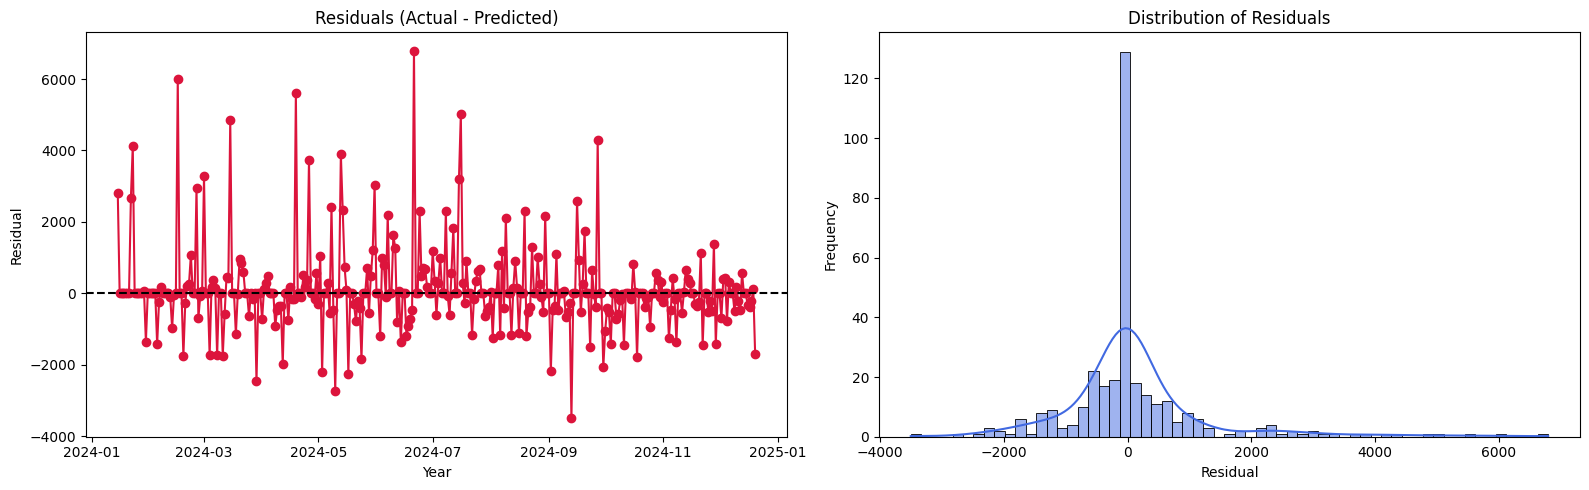

In [183]:
# Step 9: Model Evaluation
# ------------------------
# Evaluate the ARIMA model using multiple metrics and residual analysis

# Melakukan prediksi (in-sample prediction) pada seluruh data_diff
predicted_diff = model_fit.predict(start=data_diff.index[0], end=data_diff.index[-1])
pred_test = predicted_diff
actual_test = data_jenis

# 2. Evaluation Metrics
mse = mean_squared_error(actual_test, pred_test)
rmse = np.sqrt(mse)
mae = mean_absolute_error(actual_test, pred_test)
r2 = r2_score(actual_test, pred_test)

print("Model Evaluation on Test Set:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R2): {r2:.4f}")

# 3. Residual Analysis
residuals = actual_test - pred_test

plt.figure(figsize=(16, 5))
plt.subplot(1, 2, 1)
plt.plot(data_jenis.index, residuals, marker='o', linestyle='-', color='crimson')
plt.axhline(0, color='black', linestyle='--')
plt.title('Residuals (Actual - Predicted)')
plt.xlabel('Year')
plt.ylabel('Residual')
plt.grid(False)

plt.subplot(1, 2, 2)
sns.histplot(residuals, kde=True, color='royalblue')
plt.title('Distribution of Residuals')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.grid(False)

plt.tight_layout()
plt.show()

                forecast        lower        upper
2024-12-21 -2.043772e-15 -2349.767157  2349.767157
2024-12-22 -2.942514e-15 -2349.767157  2349.767157
2024-12-23  7.264203e+02 -1623.346883  3076.187431
2024-12-24  5.218752e+02 -1827.891951  2871.642363
2024-12-25  3.764284e+02 -1973.338719  2726.195595
2024-12-26  6.174898e+02 -1732.277344  2967.256971
2024-12-27  1.610861e+03  -738.906598  3960.627716
2024-12-28 -1.943507e-15 -2371.312790  2371.312790
2024-12-29 -2.798157e-15 -2371.312790  2371.312790
2024-12-30  7.051769e+02 -1666.135847  3076.489732
2024-12-31  5.027112e+02 -1868.601620  2874.023959
2025-01-01  3.641522e+02 -2007.160542  2735.465038
2025-01-02  6.100103e+02 -1761.302444  2981.323135
2025-01-03  1.536600e+03  -834.712500  3907.913079
2025-01-04 -1.911426e-15 -2400.941256  2400.941256
2025-01-05 -2.751968e-15 -2400.941256  2400.941256
2025-01-06  6.930681e+02 -1707.873131  3094.009380
2025-01-07  4.942034e+02 -1906.737861  2895.144650
2025-01-08  3.579397e+02 -2043.

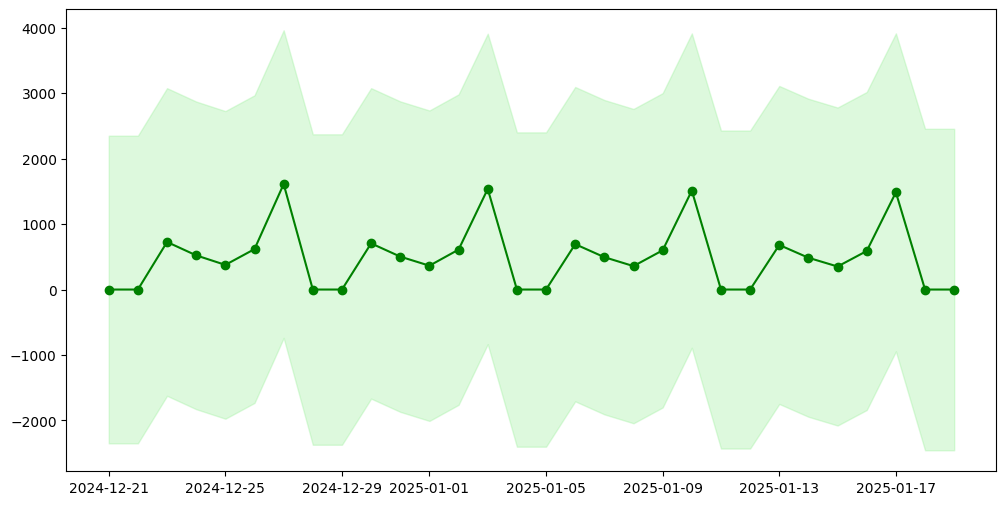

In [188]:
# PREDIKSI SELAMA 30 HARI KE DEPAN
# Menggunakan model yang sudah dilatih untuk memprediksi 30 hari ke depan
forecast = model_fit.get_forecast(steps=30)
# Mendapatkan nilai prediksi dan interval kepercayaan
forecast_index = pd.date_range(start=data_jenis.index[-1] + pd.Timedelta(days=1), periods=30, freq='D')
forecast_values = forecast.predicted_mean
conf_int = forecast.conf_int()
# Membuat DataFrame untuk hasil prediksi
forecast_df = pd.DataFrame({
    'forecast': forecast_values,
    'lower': conf_int.iloc[:, 0],
    'upper': conf_int.iloc[:, 1]
}, index=forecast_index)

# Menampilkan hasil prediksi
print(forecast_df)
# Visualisasi hasil prediksi
plt.figure(figsize=(12, 6))
plt.plot(forecast_df.index, forecast_df['forecast'], 
         label='Forecast (Next 30 Days)', marker='o', color='green')
plt.fill_between(forecast_df.index, 
                 forecast_df['lower'], 
                 forecast_df['upper'], 
                 color='lightgreen', alpha=0.3, label='95% Confidence Interval')
plt.show()